In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Import MNIST datasets

In [2]:
from torchvision import datasets
from torchvision import transforms
trainset = datasets.MNIST(root='./data',  train=True, transform=transforms.ToTensor(),download=True)
testset = datasets.MNIST(root='./data',  train=False, transform=transforms.ToTensor(),download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.8MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 479kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.39MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.58MB/s]


In [9]:
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [11]:
trainset.data.view(trainset.data.shape[0],-1).shape

torch.Size([60000, 784])

In [17]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


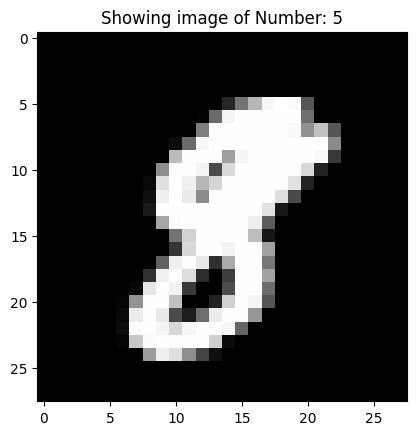

In [19]:
import matplotlib.pyplot as plt
data_iter = iter(trainloader)
images, labels = next(data_iter)

print(type(images))   ### <class 'torch.Tensor'>
print(images.shape)  ### torch.Size([64, 1, 28, 28])
print(labels.shape)  ### torch.Size([64])

plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r')
plt.gca().set_title(f'Showing image of Number: {labels[1].item()}')
plt.show();

# Define an FFN model

In [30]:
input_size = 784
hidden_sizes = [128,64]
output_size = 10

model=nn.Sequential(
    nn.Linear(input_size, hidden_sizes[0]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[0], hidden_sizes[1]),
    nn.ReLU(),
    nn.Linear(hidden_sizes[1], output_size),
    nn.Softmax(dim=1)
)

In [31]:
# Obtain images and labels from first batch
images, labels = next(iter(trainloader))
#Flatten the images
images.resize_(images.shape[0], 1, 784)
## Forward pass a image through the network after resizing
ps = model.forward(images[0,:])

In [34]:
criterion = nn.CrossEntropyLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

In [35]:
logits = model(images)
loss = criterion(logits, labels)

In [36]:
print('Before backprop: \n',model[0].weight.grad)

Before backprop: 
 None


In [37]:
loss.backward()

In [38]:
print('After backprop: \n',model[0].weight.grad)

After backprop: 
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [40]:
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)
optimizer.step()

# Train the model

In [42]:
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        ### Training pass
        optimizer.zero_grad()

        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()

        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 2.3010938884352825
Training loss: 2.2972833365519674
Training loss: 2.2896600161025775
Training loss: 2.2690239722794816
Training loss: 2.163925858067551


# Save the model

In [44]:
checkpoint = {'input_size': 784,
              'hidden_size': [128, 64],
              'output_size': 10,
              'state_dict': model.state_dict()}

torch.save(checkpoint,'model.pth')

# Load the saved model

In [47]:
from collections import OrderedDict

checkpoint = torch.load('model.pth')

model = nn.Sequential(OrderedDict([
                      ('0', nn.Linear(checkpoint["input_size"], checkpoint["hidden_size"][0])),
                      ('1', nn.ReLU()),
                      ('2', nn.Linear(checkpoint["hidden_size"][0], checkpoint["hidden_size"][1])),
                      ('3', nn.ReLU()),
                      ('4', nn.Linear(checkpoint["hidden_size"][1], checkpoint["output_size"]))]))

model.load_state_dict(checkpoint["state_dict"])

<All keys matched successfully>

In [73]:
accuracy = 0
optimizer.zero_grad()
for images, labels in testloader:
    images = images.view(images.shape[0], -1)
    probs = model(images)
    top_p, top_class = probs.topk(1, dim=1)
    equals = top_class == labels.view(*top_class.shape)
    accuracy += torch.mean(equals.type(torch.FloatTensor))
    print("Accuracy ",  (accuracy/len(testloader) * 100).item())

Accuracy  0.27866241335868835
Accuracy  0.5573248267173767
Accuracy  0.8757961988449097
Accuracy  1.2241241931915283
Accuracy  1.5226911306381226
Accuracy  1.9406847953796387
Accuracy  2.2591562271118164
Accuracy  2.5676751136779785
Accuracy  2.90605092048645
Accuracy  3.224522352218628
Accuracy  3.5828022956848145
Accuracy  3.8415603637695312
Accuracy  4.169984340667725
Accuracy  4.438694000244141
Accuracy  4.806926727294922
Accuracy  5.1453022956848145
Accuracy  5.443869590759277
Accuracy  5.682723045349121
Accuracy  5.961385250091553
Accuracy  6.2798566818237305
Accuracy  6.588375568389893
Accuracy  6.916799545288086
Accuracy  7.245223045349121
Accuracy  7.553741931915283
Accuracy  7.832404136657715
Accuracy  8.180732727050781
Accuracy  8.489252090454102
Accuracy  8.767913818359375
Accuracy  9.046576499938965
Accuracy  9.34514331817627
Accuracy  9.673566818237305
Accuracy  10.041799545288086
Accuracy  10.370223045349121
Accuracy  10.728503227233887
Accuracy  11.096735000610352
Accur